In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
import seaborn as sns

EXPLORING THE DATASET

About Dataset
PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed while constructing the dataset are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.

Class Labels
Label 1 corresponds to a legitimate URL, label 0 to a phishing URL

In [3]:
df = pd.read_csv(r'C:\Users\emman\OneDrive\Documents\Robiat\phiusiil+phishing+url+dataset.zip')

In [4]:
df.shape

(235795, 56)

In [5]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [6]:
df.DomainTitleMatchScore

0           0.000000
1          55.555556
2          46.666667
3           0.000000
4         100.000000
             ...    
235790    100.000000
235791      0.000000
235792    100.000000
235793      0.000000
235794    100.000000
Name: DomainTitleMatchScore, Length: 235795, dtype: float64

In [7]:
df.dtypes

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [8]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [9]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [11]:
df.label.value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

## EXPLORATIVE DATA ANALYSIS


This involves looking at the different columns and how they correlate with the label/target column to let us have an idea of relevant columns used in determining phishing websites. Due to the number of features used in this dataset the EDA necessary will be very harsh on features needed to be dropped.



In [12]:
df1 = df.copy()

In [13]:
df2 = df1.drop("FILENAME", axis=1)

string_columns = df1.select_dtypes(include='object').columns.tolist()

df2 = df1.drop(string_columns,axis=1)


In [14]:
correlations = df2.corr()['label'].sort_values(ascending=False)
print(correlations)


label                         1.000000
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
Robots                        0.392620
NoOfJS                        0.373500
Pay                           0.359747
NoOfSelfRef                   0.316211
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfiFrame                    0.225822
Bank                          0.188959
HasExternalFormSubmit         0.167574
HasPasswordField         

From the above list of correlations we can see that there are a lot of promising columns and due to the variety of columns we will only be working with columns that have above 0.5 correlation with the target column or below -0.5 correlation with the target column but this is only after we check for the categorical columns involved with 0 and 1 because the .corr() function does not cover this.


Text(0.5, 0, '% with that were phished')

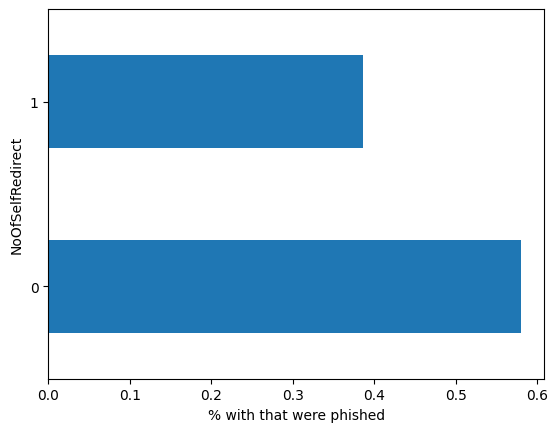

In [15]:
df1.groupby('NoOfSelfRedirect').label.mean().plot(kind='barh').set_xlabel('% with that were phished')


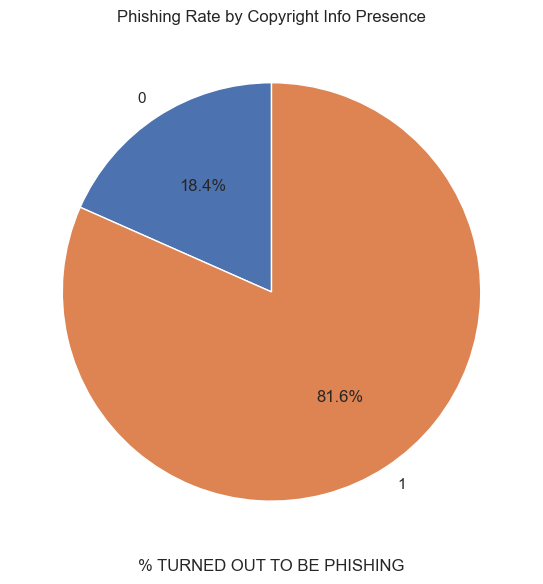

In [16]:
sns.set_theme(style="whitegrid")

# Calculate the mean phishing rate for each 'HasCopyrightInfo' group
data = df1.groupby('HasCopyrightInfo').label.mean()
# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.xlabel('% TURNED OUT TO BE PHISHING')
plt.title('Phishing Rate by Copyright Info Presence')
plt.tight_layout()
plt.show()

### Insight: Copyright Info and Phishing

From the data, 81.6% of the 235,794 website URLs with copyright info were not phishing sites. 

This is likely because phishing kits often can not copy legitimate websites, including footers with copyright notices, to appear authentic. This signifies trust, and is actually a tactic to ensure the users make the right choices as to where to leave their digital footprint and avoid potential red flags. 


Text(0.5, 0, '% with that were phished')

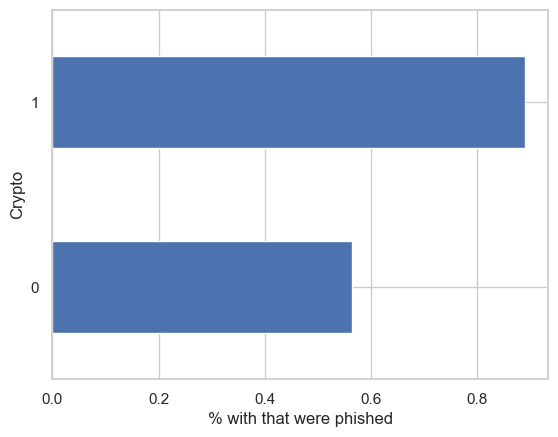

In [17]:
df1.groupby('Crypto').label.mean().plot(kind='barh').set_xlabel('% with that were phished')


This analysis revealed a much more insightful result:

This means sites that support phishing have 90% 

This is a significant difference in real-world terms and suggests that phishing sites are more likely to offer crypto payment options, perhaps to avoid chargebacks or to anonymize transactions. This kind of insight is not captured by .corr() because it treats both 0 and 1 as numeric values in a linear equation, ignoring the categorical or logical distinction between groups.

For the below analysis we will be looking at the percentage of sites that were phishing with respect to the categorical column. We want the insights to what percentage of sites in these categories turned out to be phishing sites as well as turning these categories into boolean variables 

In [18]:

binary_columns = []

for col in df1.columns:
    if col.startswith('No'):
        # Convert "No..." columns to int64
        df1[col] = df1[col].astype('int64')
    else:
        if df1[col].dtype in ['object', 'int64', 'bool']:
            unique_vals = df1[col].dropna().unique()
            if set(unique_vals).issubset({0, 1}):
                binary_columns.append(col)
                df1[col] = df1[col].astype('bool')



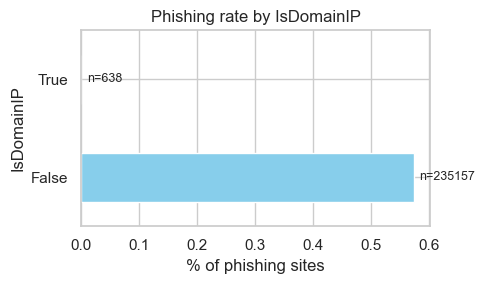

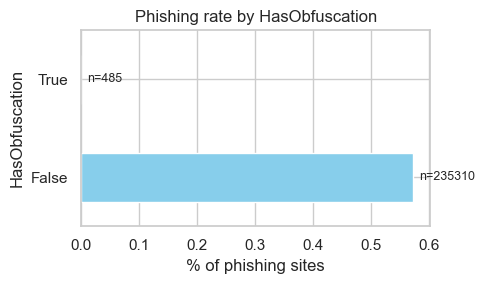

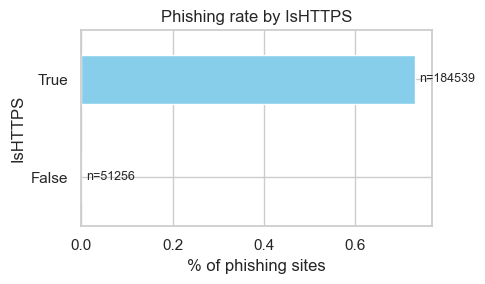

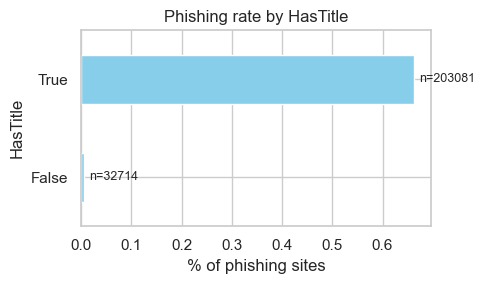

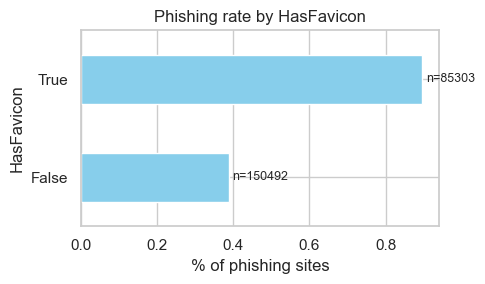

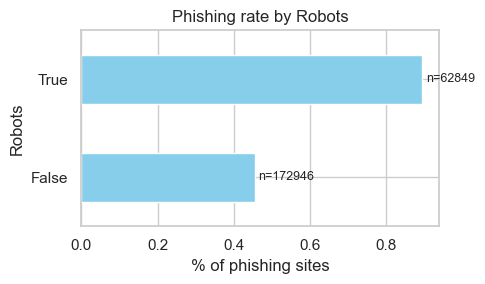

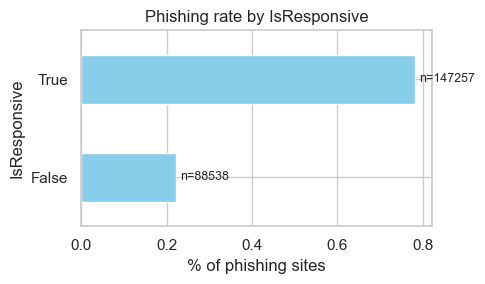

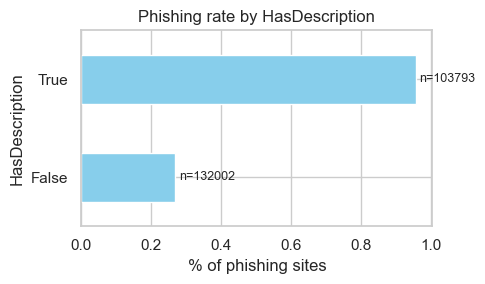

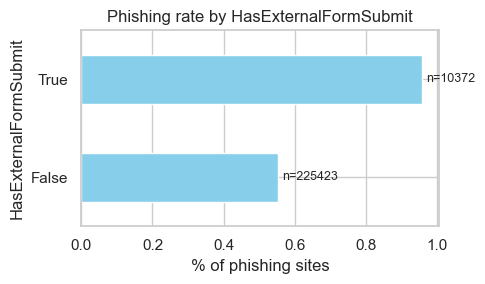

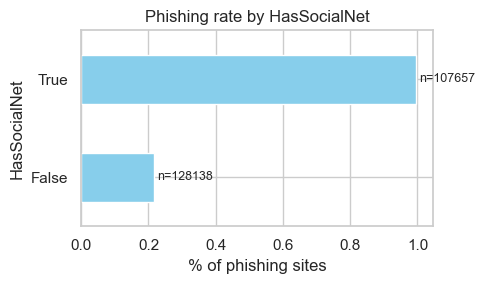

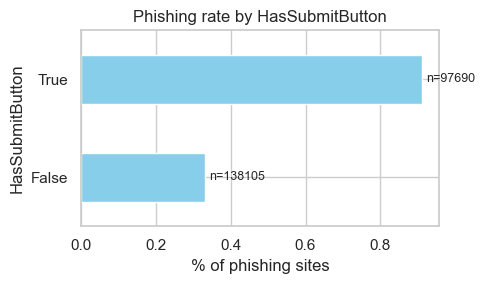

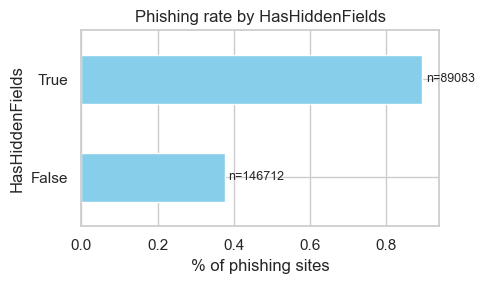

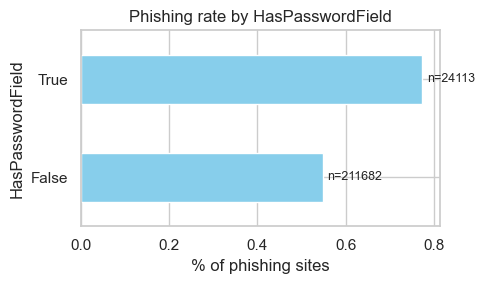

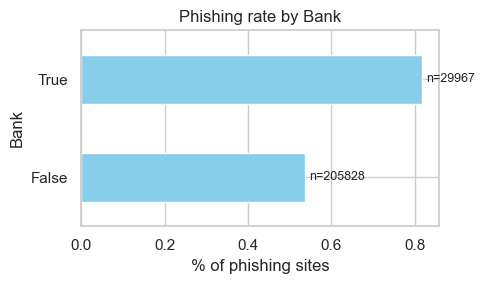

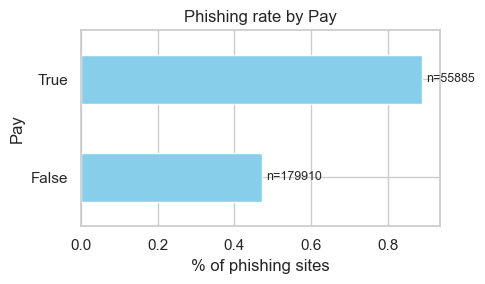

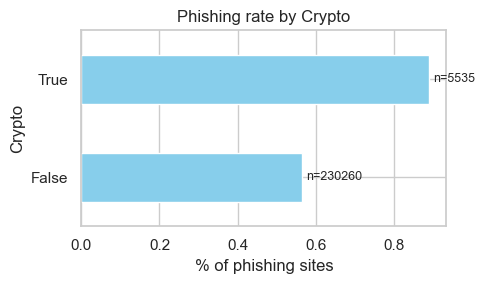

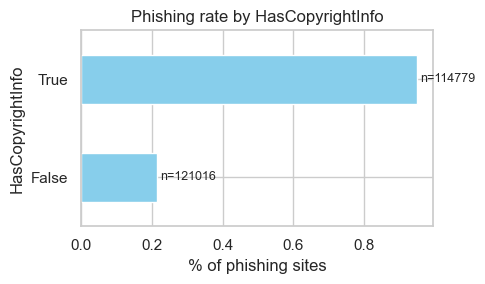

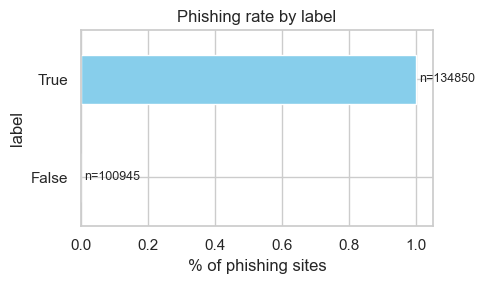

In [19]:

for col in binary_columns:
    plt.figure(figsize=(5, 3))

    # Compute phishing rate by binary column
    phishing_rate = df1.groupby(col).label.mean()

    # Compute value counts for annotation
    value_counts = df1[col].value_counts()

    # Plot
    phishing_rate.plot(kind='barh', color='skyblue')

    # Add value count annotations to each bar
    for i, (value, rate) in enumerate(phishing_rate.items()):
        count = value_counts.get(value, 0)
        plt.text(rate + 0.01, i, f'n={count}', va='center', fontsize=9)

    plt.xlabel('% of phishing sites')
    plt.title(f'Phishing rate by {col}')
    plt.tight_layout()
    plt.show()


We can see that from the above code that the feature IsDomain IP is suffering from class inbalance and therefore we can not use this column any further for our data analysis for now unless we add synthetic data to the dataset which is unnecessary. The same can not exactly be said for the HAStitle column which has an inbalance but due to the fact that the column itself is useful in phishing detection by logical reasoning we can say otherwise

The same analysis can be said for IsHTTPS in the sense that we can say that it would logically make sense that a secure site would use https and not http but there are still cases where the latter is actually a legit website therefore this column will not be dropped.

In [20]:
for i in binary_columns:
    print(f'Value counts and phishing rates for column: {i}')
    print('Value Counts:')
    print(df1[i].value_counts())
    print('\nPhishing Rates in %:')
    print(df1.groupby(i).label.mean()*100)
    print()  # Just to add a blank line between outputs


Value counts and phishing rates for column: IsDomainIP
Value Counts:
IsDomainIP
False    235157
True        638
Name: count, dtype: int64

Phishing Rates in %:
IsDomainIP
False    57.344668
True      0.000000
Name: label, dtype: float64

Value counts and phishing rates for column: HasObfuscation
Value Counts:
HasObfuscation
False    235310
True        485
Name: count, dtype: int64

Phishing Rates in %:
HasObfuscation
False    57.307382
True      0.000000
Name: label, dtype: float64

Value counts and phishing rates for column: IsHTTPS
Value Counts:
IsHTTPS
True     184539
False     51256
Name: count, dtype: int64

Phishing Rates in %:
IsHTTPS
False     0.000000
True     73.073984
Name: label, dtype: float64

Value counts and phishing rates for column: HasTitle
Value Counts:
HasTitle
True     203081
False     32714
Name: count, dtype: int64

Phishing Rates in %:
HasTitle
False     0.513542
True     66.319350
Name: label, dtype: float64

Value counts and phishing rates for column: HasFavi

In [21]:
final_features = [
    # Strong categorical predictors (from phishing rate analysis)
    'HasSocialNet',
    'HasDescription',
    'HasCopyrightInfo',
    'HasSubmitButton',
    'HasFavicon',
    'Pay',
    'HasHiddenFields',
    'IsResponsive',
    'IsHTTPS',
    'Crypto',

    # Positively correlated numerical predictors
    'URLSimilarityIndex',
    'DomainTitleMatchScore',
    'URLTitleMatchScore',
    'URLCharProb',
    'CharContinuationRate',

    # Strong negatively correlated numerical predictor
    'SpacialCharRatioInURL'
]


# ENCODING STRING COLUMNS #

The above columns are selected either based on categorical numbers or continous numbers with good relationship with the target column but for string columns like TLD where by based on current trends we can say that a site with a less popular or common tld has more likelyhood to be a phishing site hence the appropriate encoding for this column will be target/frequency encoding

This will ensure that the sites with the least common domain will be noticed and the sites with a more common domain are less likely to not be noticed/flagged

In [22]:
tld_encoding = df1.groupby('TLD')['label'].mean()
df1['TLD_encoded'] = df1['TLD'].map(tld_encoding)

In [23]:
final_features.append('TLD_encoded')

In [24]:
model_df= df1[final_features]

In [25]:
model_df.shape

(235795, 17)

In [26]:
model_df.head()

,HasSocialNet,HasDescription,HasCopyrightInfo,HasSubmitButton,HasFavicon,Pay,HasHiddenFields,IsResponsive,IsHTTPS,Crypto,URLSimilarityIndex,DomainTitleMatchScore,URLTitleMatchScore,URLCharProb,CharContinuationRate,SpacialCharRatioInURL,TLD_encoded
0,False,False,True,True,False,False,True,True,True,False,100.0,0.000000,0.000000,0.061933,1.000000,0.032,0.611129
1,True,False,True,True,True,False,False,False,True,False,100.0,55.555556,55.555556,0.050207,0.666667,0.087,0.828328
2,False,True,True,True,False,False,True,True,True,False,100.0,46.666667,46.666667,0.064129,0.866667,0.069,0.949648
3,True,False,True,True,False,True,True,True,True,True,100.0,0.000000,0.000000,0.057606,1.000000,0.038,0.611129
4,True,True,True,True,False,True,True,True,True,False,100.0,100.000000,100.000000,0.059441,1.000000,0.030,0.879264


In [27]:
model_df.dtypes

HasSocialNet                bool
HasDescription              bool
HasCopyrightInfo            bool
HasSubmitButton             bool
HasFavicon                  bool
Pay                         bool
HasHiddenFields             bool
IsResponsive                bool
IsHTTPS                     bool
Crypto                      bool
URLSimilarityIndex       float64
DomainTitleMatchScore    float64
URLTitleMatchScore       float64
URLCharProb              float64
CharContinuationRate     float64
SpacialCharRatioInURL    float64
TLD_encoded              float64
dtype: object

## Model Building and Hyperparameter tuning ##

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [29]:
x= model_df
y= df['label']
look = pd.concat([x, y], axis=1)
look.head()

,HasSocialNet,HasDescription,HasCopyrightInfo,HasSubmitButton,HasFavicon,Pay,HasHiddenFields,IsResponsive,IsHTTPS,Crypto,URLSimilarityIndex,DomainTitleMatchScore,URLTitleMatchScore,URLCharProb,CharContinuationRate,SpacialCharRatioInURL,TLD_encoded,label
0,False,False,True,True,False,False,True,True,True,False,100.0,0.000000,0.000000,0.061933,1.000000,0.032,0.611129,1
1,True,False,True,True,True,False,False,False,True,False,100.0,55.555556,55.555556,0.050207,0.666667,0.087,0.828328,1
2,False,True,True,True,False,False,True,True,True,False,100.0,46.666667,46.666667,0.064129,0.866667,0.069,0.949648,1
3,True,False,True,True,False,True,True,True,True,True,100.0,0.000000,0.000000,0.057606,1.000000,0.038,0.611129,1
4,True,True,True,True,False,True,True,True,True,False,100.0,100.000000,100.000000,0.059441,1.000000,0.030,0.879264,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)#1-----0 e.g 0.9
lr_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

In [32]:
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', lr_model)
    ],
    voting ='soft'
)

In [33]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

In [34]:
y_pred = ensemble_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9996607222375369

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [35]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [37]:
# Get feature importances from the random forest model
importances_rf = rf_model.feature_importances_

# If you also want logistic regression coefficients (as a proxy for importance)
import numpy as np

# Make sure the model is fitted before this step
coeff_lr = np.abs(lr_model.coef_[0])  # Take absolute values for comparability

In [38]:
import pandas as pd

feature_names = X_train.columns  # Assuming X_train is a DataFrame

df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest Importance': importances_rf,
    'Logistic Regression Coefficient': coeff_lr
})

# Optional: normalize or rank them
df_importance.sort_values('Random Forest Importance', ascending=False, inplace=True)

In [39]:
df_importance

,Feature,Random Forest Importance,Logistic Regression Coefficient
10,URLSimilarityIndex,0.388676,0.179285
0,HasSocialNet,0.170984,2.644121
2,HasCopyrightInfo,0.169368,1.656147
1,HasDescription,0.083075,1.603931
8,IsHTTPS,0.053200,4.167181
11,DomainTitleMatchScore,0.036297,0.058414
3,HasSubmitButton,0.025780,0.932872
12,URLTitleMatchScore,0.018216,0.048237
16,TLD_encoded,0.011813,0.711784
4,HasFavicon,0.010791,0.549128


## Ensemble Model 2 ##
Option 1: CatBoost in a Voting Classifier

In [40]:
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Initialize models
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model2 = LogisticRegression(max_iter=1001, solver='liblinear', random_state=12)
catboost_model1 = CatBoostClassifier(verbose=0, random_state=42)


In [41]:
#param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 500]
}

#grid = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)

#grid.fit(X_train, y_train)
#print("Best Params:", grid.best_params_)
#print("Best Score:", grid.best_score_)*/


IndentationError: unexpected indent (66254615.py, line 2)

In [42]:
catboost_model2 = CatBoostClassifier(learning_rate= 0.01,depth=4,iterations=300,verbose=0, random_state=42)





In [43]:
ensemble_model2 = VotingClassifier(
    estimators=[
        ('rf', rf_model2),
        ('lr', lr_model2),
        ('cb', catboost_model2)
    ],
    voting='soft'
)

In [44]:
ensemble_model2.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1001, random_state=12,
                                                 solver='liblinear')),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x000001FE1A493610>)],
                 voting='soft')

In [45]:
y_pred2 = ensemble_model2.predict(X_test)

print("voting Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))


voting Accuracy: 0.9997455416781527

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



Option 2: Stacking Classifier (Better for Complex Ensembles)

In [46]:
from sklearn.ensemble import StackingClassifier

# Define base learners
base_learners = [
    ('rf', rf_model),
    ('lr', lr_model),
    ('cb', catboost_model2)
]

In [47]:
meta_learner = CatBoostClassifier(learning_rate= 0.01,depth=4,iterations=300,verbose=50, random_state=42)

In [48]:
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=3
)


In [49]:
stack_model.fit(X_train, y_train)
y_pred3 = stack_model.predict(X_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))

0:	learn: 0.6449865	total: 18.2ms	remaining: 5.45s
50:	learn: 0.0209173	total: 1.13s	remaining: 5.49s
100:	learn: 0.0025590	total: 2.31s	remaining: 4.55s
150:	learn: 0.0009029	total: 3.31s	remaining: 3.27s
200:	learn: 0.0005817	total: 4.3s	remaining: 2.12s
250:	learn: 0.0004807	total: 5.16s	remaining: 1.01s
299:	learn: 0.0004486	total: 6.08s	remaining: 0us
Stacking Accuracy: 0.9998515659789223

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [50]:
import joblib

# Save
joblib.dump(stack_model, 'phishing_model.pkl')




['phishing_model.pkl']

In [51]:
X_first = model_df.iloc[[0]]  # Keep as DataFrame (not Series)
print(X_first)

   HasSocialNet  HasDescription  HasCopyrightInfo  HasSubmitButton  \
0         False           False              True             True   

   HasFavicon    Pay  HasHiddenFields  IsResponsive  IsHTTPS  Crypto  \
0       False  False             True          True     True   False   

   URLSimilarityIndex  DomainTitleMatchScore  URLTitleMatchScore  URLCharProb  \
0               100.0                    0.0                 0.0     0.061933   

   CharContinuationRate  SpacialCharRatioInURL  TLD_encoded  
0                   1.0                  0.032     0.611129  


In [52]:
prediction = stack_model.predict(X_first)
print("Predicted class:", prediction[0])


Predicted class: 1


## MODEL PERFORMANCE ANALYSIS

0:	learn: 0.6499770	test: 0.6500137	best: 0.6500137 (0)	total: 54.7ms	remaining: 16.4s
10:	learn: 0.3294811	test: 0.3296076	best: 0.3296076 (10)	total: 547ms	remaining: 14.4s
20:	learn: 0.1683394	test: 0.1685936	best: 0.1685936 (20)	total: 1.08s	remaining: 14.4s
30:	learn: 0.0875168	test: 0.0878533	best: 0.0878533 (30)	total: 1.79s	remaining: 15.5s
40:	learn: 0.0494582	test: 0.0498734	best: 0.0498734 (40)	total: 2.29s	remaining: 14.5s
50:	learn: 0.0285614	test: 0.0290449	best: 0.0290449 (50)	total: 2.81s	remaining: 13.7s
60:	learn: 0.0169466	test: 0.0174806	best: 0.0174806 (60)	total: 3.33s	remaining: 13.1s
70:	learn: 0.0107368	test: 0.0113215	best: 0.0113215 (70)	total: 3.88s	remaining: 12.5s
80:	learn: 0.0070211	test: 0.0076510	best: 0.0076510 (80)	total: 4.28s	remaining: 11.6s
90:	learn: 0.0050203	test: 0.0056958	best: 0.0056958 (90)	total: 4.8s	remaining: 11s
100:	learn: 0.0037839	test: 0.0045003	best: 0.0045003 (100)	total: 5.18s	remaining: 10.2s
110:	learn: 0.0029801	test: 0.0037

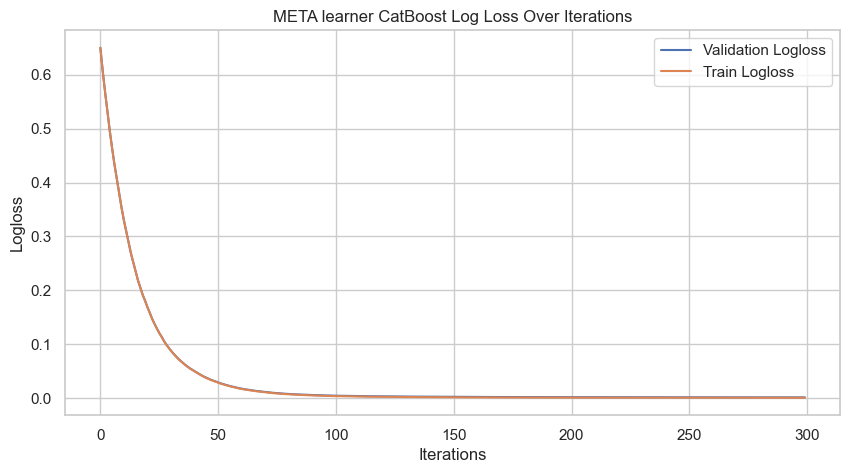

In [53]:
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

cb = CatBoostClassifier(learning_rate=0.01, depth=4, iterations=300, verbose=0, random_state=42)

cb.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=10)

# Plot log loss
plt.figure(figsize=(10, 5))
plt.plot(cb.evals_result_['validation']['Logloss'], label='Validation Logloss')
plt.plot(cb.evals_result_['learn']['Logloss'], label='Train Logloss')
plt.title('META learner CatBoost Log Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.legend()
plt.grid(True)
plt.show()


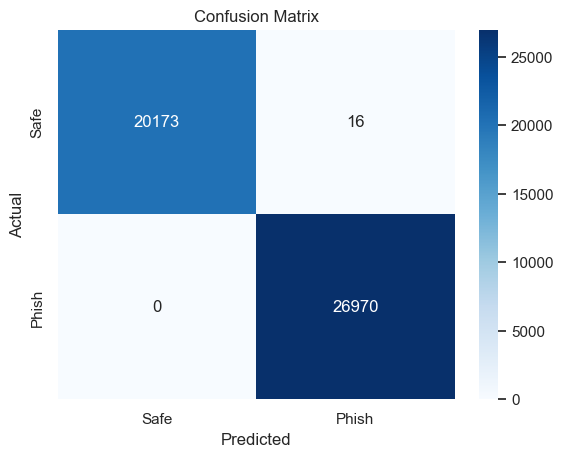

In [54]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phish'], yticklabels=['Safe', 'Phish'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [55]:
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
catboost_model2.fit(X_train, y_train)


In [56]:
rf_importances = rf_model.feature_importances_


In [57]:

lr_importances = np.abs(lr_model.coef_[0])  # Use absolute values for interpretability


In [58]:
cb_importances = catboost_model2.get_feature_importance()


In [59]:
features = X_train.columns

df_importance2 = pd.DataFrame({
    'Feature': features,
    'Random Forest Importance': rf_importances,
    'Logistic Regression Coefficient': lr_importances,
    'CatBoost Importance': cb_importances
})

# Optional: Normalize each column for fair comparison
for col in df_importance2.columns[1:]:
    df_importance2[col] = df_importance2[col] / df_importance2[col].max()


In [60]:
df_importance2

,Feature,Random Forest Importance,Logistic Regression Coefficient,CatBoost Importance
0,HasSocialNet,0.439914,0.634511,0.022433
1,HasDescription,0.213738,0.384896,0.015106
2,HasCopyrightInfo,0.435756,0.397426,0.017786
3,HasSubmitButton,0.066326,0.223862,0.004895
4,HasFavicon,0.027765,0.131774,0.006672
5,Pay,0.001546,0.091356,0.001028
6,HasHiddenFields,0.022986,0.144889,0.000745
7,IsResponsive,0.015317,0.026950,0.002883
8,IsHTTPS,0.136875,1.000000,0.027326
9,Crypto,0.000109,0.204138,0.000380


In [61]:
df_importance2['Average_Importance'] = df_importance2[
    ['Random Forest Importance', 'Logistic Regression Coefficient', 'CatBoost Importance']
].mean(axis=1)

df_importance2.sort_values('Average_Importance', ascending=False, inplace=True)


In [62]:
df_importance2

,Feature,Random Forest Importance,Logistic Regression Coefficient,CatBoost Importance,Average_Importance
10,URLSimilarityIndex,1.000000,0.043023,1.000000,0.681008
8,IsHTTPS,0.136875,1.000000,0.027326,0.388067
0,HasSocialNet,0.439914,0.634511,0.022433,0.365619
15,SpacialCharRatioInURL,0.024624,0.846272,0.002192,0.291029
2,HasCopyrightInfo,0.435756,0.397426,0.017786,0.283656
1,HasDescription,0.213738,0.384896,0.015106,0.204580
14,CharContinuationRate,0.007522,0.569794,0.001167,0.192828
3,HasSubmitButton,0.066326,0.223862,0.004895,0.098361
13,URLCharProb,0.009711,0.202266,0.001719,0.071232
9,Crypto,0.000109,0.204138,0.000380,0.068209


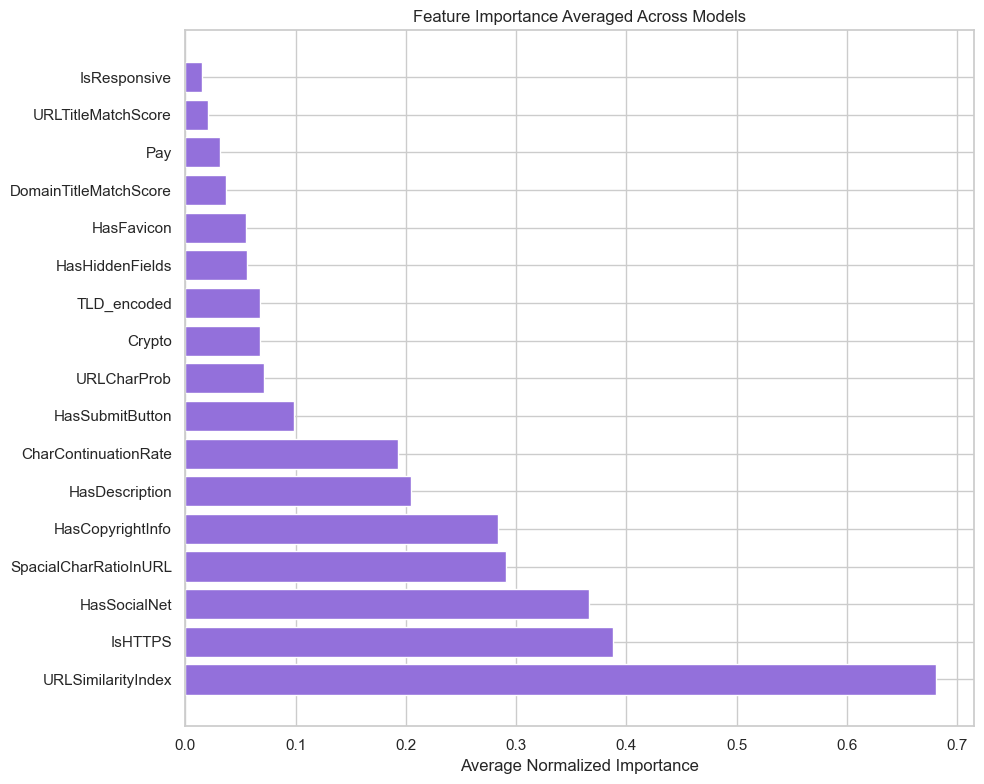

In [63]:
plt.figure(figsize=(10, 8))
plt.barh(df_importance2['Feature'], df_importance2['Average_Importance'], color='mediumpurple')
plt.xlabel("Average Normalized Importance")
plt.title("Feature Importance Averaged Across Models")
plt.tight_layout()
plt.show()

In [29]:
import re
import requests
from bs4 import BeautifulSoup
import tldextract
from difflib import SequenceMatcher
from urllib.parse import urlparse

In [31]:
df4 = df1[['TLD', 'TLD_encoded']].drop_duplicates().sort_values('TLD')
df4.to_csv("tld_dict.csv", index=False)
TLD_PHISHING_RATE = df4.set_index('TLD')['TLD_encoded'].to_dict()


In [32]:
TLD_PHISHING_RATE.get('co.uk', 0.0)


0.0

In [33]:
print(TLD_PHISHING_RATE)

{'100': 0.0, '101': 0.0, '103': 0.0, '106': 0.0, '107': 0.0, '108': 0.0, '11': 0.0, '110': 0.0, '111': 0.0, '116': 0.0, '117': 0.0, '12': 0.0, '120': 0.0, '121': 0.0, '123': 0.0, '125': 0.0, '126': 0.0, '126:8080': 0.0, '128': 0.0, '13': 0.0, '130': 0.0, '133:8080': 0.0, '134': 0.0, '136': 0.0, '14': 0.0, '140': 0.0, '145': 0.0, '146': 0.0, '148': 0.0, '149': 0.0, '15': 0.0, '150': 0.0, '151': 0.0, '154': 0.0, '155': 0.0, '158': 0.0, '160': 0.0, '161': 0.0, '162': 0.0, '163': 0.0, '165': 0.0, '166': 0.0, '167': 0.0, '171': 0.0, '173': 0.0, '177': 0.0, '178': 0.0, '181': 0.0, '182': 0.0, '184': 0.0, '185': 0.0, '187': 0.0, '188:10003': 0.0, '189': 0.0, '196': 0.0, '197': 0.0, '198': 0.0, '199': 0.0, '20': 0.0, '200': 0.0, '203': 0.0, '206': 0.0, '21': 0.0, '210': 0.0, '211': 0.0, '211:8383': 0.0, '214': 0.0, '216': 0.0, '220': 0.0, '221': 0.0, '222': 0.0, '223': 0.0, '225': 0.0, '227': 0.0, '230': 0.0, '231': 0.0, '232': 0.0, '233': 0.0, '234': 0.0, '235': 0.0, '237': 0.0, '238': 0.0, '

In [34]:
def fetch_page(url):
    """Fetch page content with user-agent header and timeout."""
    headers = {'User-Agent': 'Mozilla/5.0 (compatible; Bot/1.0)'}
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            return response.text
        else:
            print(f"Warning: Received status code {response.status_code} for URL {url}")
    except requests.RequestException as e:
        print(f"Error fetching page {url}: {e}")
    return None

In [35]:
def has_keyword(text, keywords):
    """Check if any keyword is present in text (case-insensitive)."""
    if text:
        text_lower = text.lower()
        return any(kw in text_lower for kw in keywords)
    return False

In [36]:
def char_probability(url):
    """Estimate character distribution typicality in URL."""
    total = len(url)
    if total == 0:
        return 0
    special_chars = len(re.findall(r'[^a-zA-Z0-9]', url))
    return 1 - (special_chars / total)  # Higher means more normal characters

In [37]:
def char_continuation_rate(url):
    """Heuristic for repeated character sequences."""
    repeats = len(re.findall(r'(.)\1{2,}', url))  # 3+ repeated chars
    total = len(url)
    if total == 0:
        return 0
    return 1 - (repeats / total)

In [38]:
def spacial_char_ratio(url):
    """Ratio of special chars to total in URL."""
    total = len(url)
    specials = len(re.findall(r'[^a-zA-Z0-9]', url))
    if total == 0:
        return 0
    return specials / total

In [39]:
def similarity(a, b):
    """Levenshtein-based similarity ratio."""
    if not a or not b:
        return 0
    return SequenceMatcher(None, a, b).ratio()

In [40]:
def adjusted_similarity(a, b):
    score = similarity(a, b) * 100
    return 100 if score > 70 else score

In [41]:
def is_legit_domain(base_domain, url):
    try:
        parsed = urlparse(url)
        netloc = parsed.netloc.lower()
        if netloc.startswith("www."):
            netloc = netloc[4:]
        return 100 if netloc == base_domain.lower() else adjusted_similarity(base_domain, netloc)
    except:
        return 0

In [42]:
def extract_lexical_features(url, domain_title='', page_title=''):
    parsed = urlparse(url)
    domain = parsed.netloc.lower()
    full_url = url.lower()
    features = {
        'URLSimilarityIndex': is_legit_domain(domain, full_url),
        'DomainTitleMatchScore': adjusted_similarity(domain_title.lower(), domain) if domain_title else 0,
        'URLTitleMatchScore': adjusted_similarity(page_title.lower(), full_url) if page_title else 0,
        'URLCharProb': char_probability(full_url),
        'CharContinuationRate': char_continuation_rate(full_url),
        'SpacialCharRatioInURL': spacial_char_ratio(full_url)
    }
    return features

In [43]:

def extract_structural_features(html):
    """Extract HTML-structure-based features from a web page."""
    soup = BeautifulSoup(html, 'html.parser')

    # Detect presence of submit buttons
    has_submit_button = bool(soup.select('input[type="submit"], button[type="submit"], button'))

    # Detect hidden input fields
    has_hidden_fields = bool(soup.find_all('input', type='hidden'))

    # Detect favicon in various formats
    has_favicon = bool(soup.find('link', rel=lambda rel: rel and 'icon' in rel.lower()))

    # Detect viewport meta tag for responsiveness
    is_responsive = bool(soup.find('meta', attrs={'name': 'viewport'}))

    # Detect presence of meta description
    has_description = bool(soup.find('meta', attrs={'name': 'description'}))

    # Detect copyright notice
    footer = soup.find('footer')
    footer_text = footer.get_text(" ", strip=True).lower() if footer else ''
    has_copyright_info = 'copyright' in footer_text or '©' in footer_text

    return {
        'HasSubmitButton': has_submit_button,
        'HasHiddenFields': has_hidden_fields,
        'HasFavicon': has_favicon,
        'IsResponsive': is_responsive,
        'HasDescription': has_description,
        'HasCopyrightInfo': has_copyright_info
    }


In [44]:
# Extended keyword lists
CRYPTO_KEYWORDS = [
    'btc', 'bitcoin', 'eth', 'ethereum', 'crypto', 'blockchain',
    'coin', 'token', 'web3'
]

PAY_KEYWORDS = [
    'pay', 'shop', 'payment', 'checkout', 'card', 'bank',
    'securepay', 'paypal', 'visa', 'mastercard'
]

SOCIAL_KEYWORDS = [
    'facebook', 'twitter', 'instagram', 'linkedin', 'youtube'
]

def has_keyword(text, keywords):
    if not text:
        return False
    text = text.lower()
    return any(re.search(rf'\b{re.escape(kw)}\b', text) for kw in keywords)

def extract_categorical_features(url, html_text):
    """Extract keyword and scheme based binary features."""
    url_lower = url.lower()
    page_text = html_text.lower() if html_text else ''

    features = {
        'HasSocialNet': any(sk in url_lower for sk in SOCIAL_KEYWORDS) or any(sk in page_text for sk in SOCIAL_KEYWORDS),
        'Crypto': has_keyword(url_lower, CRYPTO_KEYWORDS) or has_keyword(page_text, CRYPTO_KEYWORDS),
        'Pay': has_keyword(url_lower, PAY_KEYWORDS) or has_keyword(page_text, PAY_KEYWORDS),
        'IsHTTPS': url_lower.startswith('https://')
    }
    return features


In [45]:
def encode_tld(url):
    """Map TLD to phishing rate or default 0."""
    ext = tldextract.extract(url)
    tld = ext.suffix.lower()
    return TLD_PHISHING_RATE.get(tld, 0.0)

In [46]:
def extract_features(url):
    """Complete feature extraction pipeline for a single URL."""
    html = fetch_page(url)
    page_title = ''
    domain_title = ''
    if html:
        soup = BeautifulSoup(html, 'html.parser')
        page_title = soup.title.string if soup.title else ''
        domain_title_tag = soup.find('title')
        domain_title = domain_title_tag.string if domain_title_tag else ''
    lexical = extract_lexical_features(url, domain_title, page_title)
    structural = extract_structural_features(html) if html else {
        'HasSubmitButton':0, 'HasHiddenFields':0, 'HasFavicon':0,
        'IsResponsive':0, 'HasDescription':0, 'HasCopyrightInfo':0
    }
    categorical = extract_categorical_features(url, html)
    tld_encoded = encode_tld(url)
    features = {**categorical, **structural, **lexical, 'TLD_encoded': tld_encoded}
    feature_order = [
        'HasSocialNet', 'HasDescription', 'HasCopyrightInfo', 'HasSubmitButton',
        'HasFavicon', 'Pay', 'HasHiddenFields', 'IsResponsive', 'IsHTTPS', 'Crypto',
        'URLSimilarityIndex', 'DomainTitleMatchScore', 'URLTitleMatchScore',
        'URLCharProb', 'CharContinuationRate', 'SpacialCharRatioInURL',
        'TLD_encoded'
    ]
    feature_vector = [features.get(f, 0) for f in feature_order]
    return feature_vector

In [81]:
def feature_vector_to_DB(features):
    feature_order = [
        'HasSocialNet', 'HasDescription', 'HasCopyrightInfo', 'HasSubmitButton',
        'HasFavicon', 'Pay', 'HasHiddenFields', 'IsResponsive', 'IsHTTPS', 'Crypto',
        'URLSimilarityIndex', 'DomainTitleMatchScore', 'URLTitleMatchScore',
        'URLCharProb', 'CharContinuationRate', 'SpacialCharRatioInURL',
        'TLD_encoded'
    ]
    
    features_df = pd.DataFrame([features], columns=feature_order)
    print(features_df)
    return features_df

In [82]:
def phish_detection(feature_dataframe):
    # Load the trained model once (consider loading outside this function for efficiency)
    loaded_model = joblib.load('phishing_model.pkl')
    
    # Predict class (0 = phishing, 1 = safe)
    prediction = loaded_model.predict(feature_dataframe)[0]
    
    # Predict probability for class 1 (safe)
    proba = loaded_model.predict_proba(feature_dataframe)[0][1]

    # Display results
    if prediction == 1:
        print()
        print(f"✅ Site is SAFE to use Chance of being legit is {proba*100}% ")
    else:
        print(f"❌ Site is NOT SAFE (Phishing)")
    return prediction, proba

In [83]:
def phish_detect_pipeline(test_url):
    # Extract features from URL
    features = extract_features(test_url)
    
    # Convert feature vector to DataFrame for model input
    feature_df = feature_vector_to_DB(features)
    
    # Run prediction
    prediction, probability = phish_detection(feature_df)
    


In [84]:
loaded_model = joblib.load('phishing_model.pkl')

In [85]:
if __name__ == "__main__":
    test_url = 'http://secure-login-paypal.com'
    model_result=phish_detect_pipeline(test_url) #extracted features
 

Error fetching page http://secure-login-paypal.com: HTTPConnectionPool(host='secure-login-paypal.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x000001FE1A890090>: Failed to resolve 'secure-login-paypal.com' ([Errno 11002] getaddrinfo failed)"))
   HasSocialNet  HasDescription  HasCopyrightInfo  HasSubmitButton  \
0         False               0                 0                0   

   HasFavicon   Pay  HasHiddenFields  IsResponsive  IsHTTPS  Crypto  \
0           0  True                0             0    False   False   

   URLSimilarityIndex  DomainTitleMatchScore  URLTitleMatchScore  URLCharProb  \
0                 100                      0                   0          0.8   

   CharContinuationRate  SpacialCharRatioInURL  TLD_encoded  
0                   1.0                    0.2     0.611129  
❌ Site is NOT SAFE (Phishing)
